In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import json


# 1) Ver todas as GPUs
gpus = tf.config.list_physical_devices("GPU")
print("GPUs detectadas:", gpus)

if gpus:
    # 2) (Opcional) limitar a visão só à primeira GPU
    tf.config.set_visible_devices(gpus[0], "GPU")

    # 3) (Recomendado) liberar memória sob demanda
    tf.config.experimental.set_memory_growth(gpus[0], True)

GPUs detectadas: []


In [10]:
# LIBS

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from sklearn.model_selection import TimeSeriesSplit
import keras

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=13)

from matplotlib.pyplot import figure

figure(figsize = (16, 6), dpi = 100)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Dados sintéticos criados com sucesso!
Shape: (1000, 11)
Valores ausentes: 100
INICIANDO PROCESSAMENTO DO DATASET MULTIVARIADO
[DEBUG] Pré-processando dados:
  - Shape inicial: (1000, 11)
  - Colunas: ['Data', 'throughput_raw', 'hour', 'day_of_week', 'relative_day', 'is_weekend', 'time_since_start', 'hour_sin', 'hour_cos', 'is_real', 'time_since_last_real']
[DEBUG] Estatísticas da throughput_raw:
  - Min: -1.0
  - Max: 81931075.67844862
  - Mean: 45600761.87880661
  - NaN count: 0
  - -1 count: 100
[DEBUG] Estatísticas do throughput_raw:
  - Min: -1.0
  - Max: 81931075.67844862
  - Mean: 45600761.87880661
  - NaN count: 0
  - -1 count: 100
[DEBUG] Dados pré-processados:
  - Shape final: (1000, 14)
  - throughput_raw range: [-0.0000, 81.9311]
  - throughput_raw range: [-0.0000, 81.9311]
[DEBUG] Máscara total: 1000 pontos válidos de 1000
[DEBUG] Split dados:
  - Treino: 800 pontos
  - Teste: 200 pontos
[DEBUG] Criando scalers para features:
  - throughput_raw: [-0.0000, 81.9311]
  - throu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 3, 64)          │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,161 (125.63 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)


INICIANDO TREINAMENTO
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - loss: 2382.7708 - mae: 45.6452 - root_mean_squared_error: 48.8116 - val_loss: 2066.8311 - val_mae: 41.6824 - val_root_mean_squared_error: 45.4624
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2218.8064 - mae: 44.0724 - root_mean_squared_error: 47.0952 - val_loss: 1761.3246 - val_mae: 38.8881 - val_root_mean_squared_error: 41.9681
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1898.2924 - mae: 41.2313 - root_mean_squared_error: 43.5609 - val_loss: 1583.6429 - val_mae: 37.1112 - val_root_mean_squared_error: 39.7950
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1689.7887 - mae: 38.8964 - root_mean_squared_error: 41.1004 - val_loss: 1503.3008 - val_mae: 36.2659 - val_root_mean_squared_error: 38.7724
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1620.0730 - mae: 38.0135 - root_mean_squared_error: 40.2445 - val_loss: 1444.9821 - val_mae: 35.6336 - val_root_mea

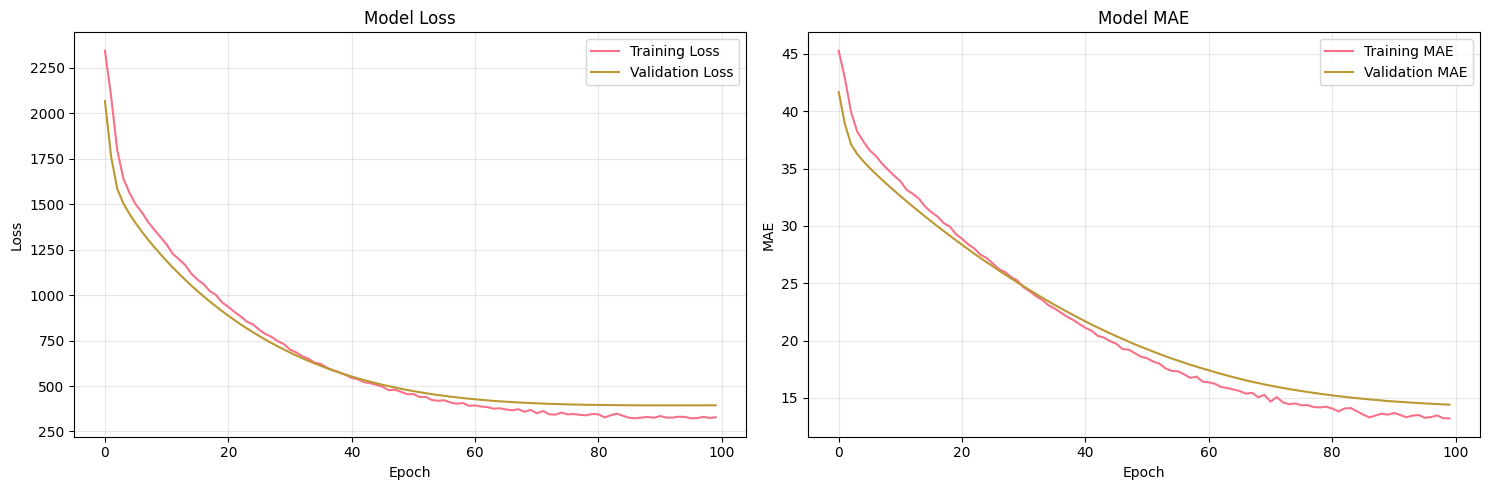


INICIANDO PREDIÇÕES
[DEBUG] Iniciando walk-forward validation:
  - Tamanho teste: 200
  - Look back: 3
  - Window size: 28
  - Máscara teste: 200 pontos válidos de 200
[DEBUG] Estado inicial shape: (1, 3, 12)
[DEBUG] Estado inicial range: [0.0000, 1.0000]
[DEBUG] Processando janela 1: [0:28]
    Ponto 0: pred_scaled=43.4553, pred_orig=3560.3430
    Ponto 1: pred_scaled=43.4626, pred_orig=3560.9368
    Ponto 2: pred_scaled=43.4592, pred_orig=3560.6614
    Ponto 3: pred_scaled=43.4640, pred_orig=3561.0496
    Ponto 4: pred_scaled=43.4607, pred_orig=3560.7788
    Janela completa: 28 predições
[DEBUG] Processando janela 2: [28:56]
    Ponto 0: pred_scaled=43.4794, pred_orig=3562.3176
    Ponto 1: pred_scaled=43.4801, pred_orig=3562.3701
    Ponto 2: pred_scaled=43.4798, pred_orig=3562.3501
    Ponto 3: pred_scaled=43.4789, pred_orig=3562.2751
    Ponto 4: pred_scaled=43.4833, pred_orig=3562.6367
    Janela completa: 28 predições
[DEBUG] Processando janela 3: [56:84]
    Ponto 0: pred_scal

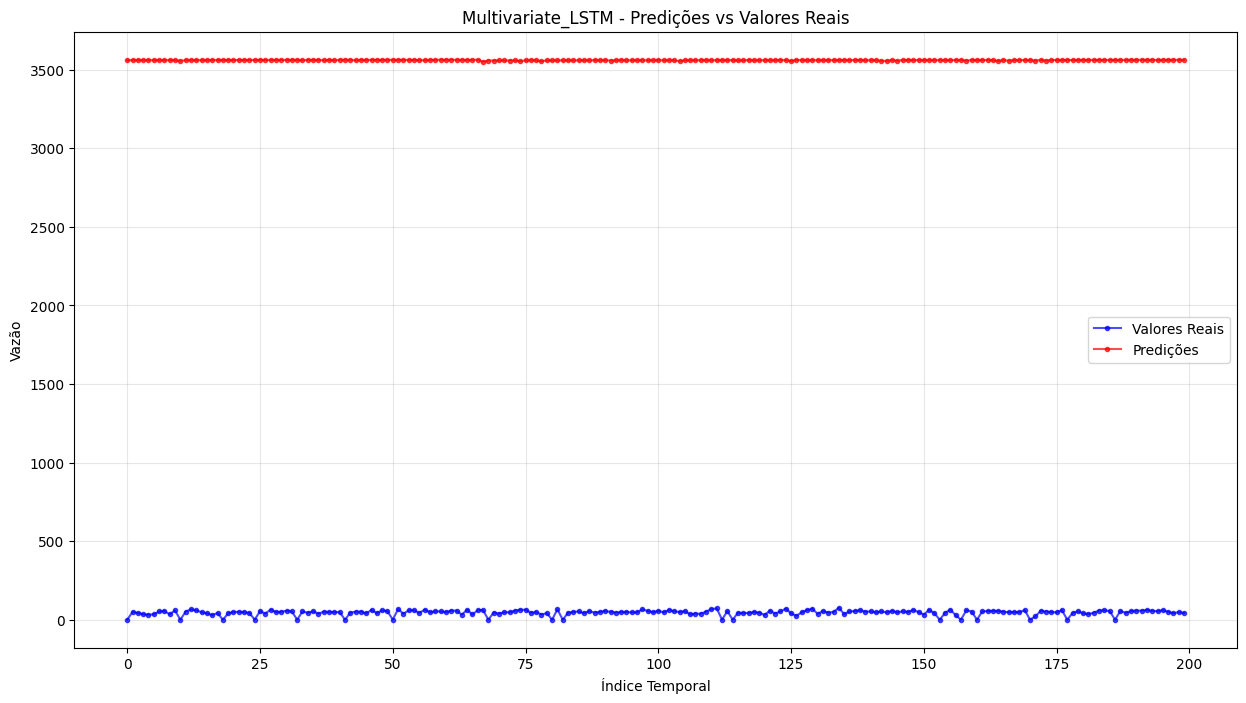


RESULTADOS FINAIS
RMSE: 3515.2139
MAE: 3515.1723
NRMSE: 4598.45%
Data Range: 76.4434

Processamento concluído com sucesso!


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
import warnings
import os
warnings.filterwarnings('ignore')

# Configuração de estilo para plots
plt.style.use('default')
sns.set_palette("husl")

def create_multivariate_dataset(data, feature_columns, target_column, look_back=3):
    """
    Cria dataset multivariado para LSTM
    """
    print(f"[DEBUG] Criando dataset multivariado:")
    print(f"  - Shape dos dados: {data.shape}")
    print(f"  - Features: {feature_columns}")
    print(f"  - Target: {target_column}")
    print(f"  - Look back: {look_back}")
    
    Xs, ys = [], []
    
    for i in range(len(data) - look_back):
        # Features: incluem todas as colunas especificadas
        features = data[feature_columns].iloc[i:i+look_back].values
        Xs.append(features)
        
        # Target: apenas a vazão
        target = data[target_column].iloc[i+look_back]
        ys.append(target)
    
    X_array = np.array(Xs, dtype=np.float32)
    y_array = np.array(ys, dtype=np.float32)
    
    print(f"[DEBUG] Dataset criado:")
    print(f"  - X shape: {X_array.shape}")
    print(f"  - y shape: {y_array.shape}")
    print(f"  - X range: [{np.min(X_array):.4f}, {np.max(X_array):.4f}]")
    print(f"  - y range: [{np.min(y_array):.4f}, {np.max(y_array):.4f}]")
    
    return X_array, y_array

def create_multivariate_lstm(units, n_features, look_back, learning_rate):
    """
    Cria modelo LSTM para entrada multivariada
    """
    print(f"[DEBUG] Criando modelo LSTM:")
    print(f"  - Units: {units}")
    print(f"  - Features: {n_features}")
    print(f"  - Look back: {look_back}")
    print(f"  - Learning rate: {learning_rate}")
    
    model = Sequential()
    
    # Primeira camada LSTM
    model.add(LSTM(
        units=units, 
        return_sequences=True, 
        input_shape=(look_back, n_features),
        dropout=0.2,
        recurrent_dropout=0.2
    ))
    
    # Segunda camada LSTM
    model.add(LSTM(
        units=units//2, 
        dropout=0.2,
        recurrent_dropout=0.2
    ))
    
    # Camada de regularização
    model.add(Dropout(0.2))
    
    # Camada densa para saída
    model.add(Dense(1, activation='linear'))
    
    # Compilação
    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['mae', RootMeanSquaredError()]
    )
    
    print(f"[DEBUG] Modelo compilado com sucesso")
    model.summary()
    
    return model

def preprocess_multivariate_data(df):
    """
    Pré-processa dados multivariados
    """
    print(f"[DEBUG] Pré-processando dados:")
    print(f"  - Shape inicial: {df.shape}")
    print(f"  - Colunas: {df.columns.tolist()}")
    
    df = df.copy()
    
    # Verificar se as colunas necessárias existem
    required_columns = ['throughput_raw', 'throughput_raw', 'hour', 'day_of_week', 'relative_day',
                       'is_weekend', 'time_since_start', 'hour_sin', 'hour_cos',
                       'is_real', 'time_since_last_real']
    
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"[WARNING] Colunas ausentes: {missing_columns}")
        # Criar colunas ausentes com valores padrão
        for col in missing_columns:
            df[col] = 0
    
    # Verificar valores da vazão
    print(f"[DEBUG] Estatísticas da throughput_raw:")
    print(f"  - Min: {df['throughput_raw'].min()}")
    print(f"  - Max: {df['throughput_raw'].max()}")
    print(f"  - Mean: {df['throughput_raw'].mean()}")
    print(f"  - NaN count: {df['throughput_raw'].isna().sum()}")
    print(f"  - -1 count: {(df['throughput_raw'] == -1).sum()}")
    
    # Verificar valores do throughput_raw
    print(f"[DEBUG] Estatísticas do throughput_raw:")
    print(f"  - Min: {df['throughput_raw'].min()}")
    print(f"  - Max: {df['throughput_raw'].max()}")
    print(f"  - Mean: {df['throughput_raw'].mean()}")
    print(f"  - NaN count: {df['throughput_raw'].isna().sum()}")
    print(f"  - -1 count: {(df['throughput_raw'] == -1).sum()}")
    
    # Converter throughput_raw para escala adequada (assumindo que está em bits, convertendo para Mbps)
    df['throughput_raw'] = df['throughput_raw'] / 1000000  # bits para Mbps
    
    # Tratar valores ausentes
    df['throughput_raw'] = df['throughput_raw'].replace(-1, np.nan)
    df['throughput_raw'] = df['throughput_raw'].replace(-1, np.nan)
    
    # Criar feature de confiabilidade
    df['reliability_score'] = np.where(
        df['is_real'] == 1, 
        1.0,
        np.maximum(0.1, 1.0 - (df['time_since_last_real'] / 24.0))
    )
    
    # Normalizar features temporais
    if df['time_since_last_real'].max() > 0:
        df['time_since_last_real_norm'] = df['time_since_last_real'] / df['time_since_last_real'].max()
    else:
        df['time_since_last_real_norm'] = 0.0
    
    if df['time_since_start'].max() > 0:
        df['time_since_start_norm'] = df['time_since_start'] / df['time_since_start'].max()
    else:
        df['time_since_start_norm'] = 0.0
    
    print(f"[DEBUG] Dados pré-processados:")
    print(f"  - Shape final: {df.shape}")
    print(f"  - throughput_raw range: [{df['throughput_raw'].min():.4f}, {df['throughput_raw'].max():.4f}]")
    print(f"  - throughput_raw range: [{df['throughput_raw'].min():.4f}, {df['throughput_raw'].max():.4f}]")
    
    return df

def create_feature_scalers(train_data, feature_columns):
    """
    Cria scalers para as features
    """
    print(f"[DEBUG] Criando scalers para features:")
    
    scalers = {}
    
    for feature in feature_columns:
        if feature in train_data.columns:
            scaler = MinMaxScaler()
            feature_data = train_data[feature].values.reshape(-1, 1)
            
            # Verificar se há valores válidos
            if not np.all(np.isnan(feature_data)):
                scaler.fit(feature_data)
                scalers[feature] = scaler
                print(f"  - {feature}: [{scaler.data_min_[0]:.4f}, {scaler.data_max_[0]:.4f}]")
            else:
                print(f"  - {feature}: TODOS VALORES NaN - pulando")
    
    return scalers

def scale_features(data, feature_columns, scalers):
    """
    Aplica scaling nas features
    """
    scaled_data = data.copy()
    
    for feature in feature_columns:
        if feature in scalers:
            original_values = scaled_data[feature].values.reshape(-1, 1)
            scaled_values = scalers[feature].transform(original_values)
            scaled_data[feature] = scaled_values.flatten()
        else:
            print(f"[WARNING] Feature {feature} não tem scaler - mantendo valores originais")
    
    return scaled_data

def walk_forward_validation_multivariate(model, scalers, train_data, test_data, 
                                        feature_columns, target_column, mask_test, 
                                        look_back, window_size):
    """
    Executa walk-forward validation para modelo multivariado
    """
    print(f"[DEBUG] Iniciando walk-forward validation:")
    print(f"  - Tamanho teste: {len(test_data)}")
    print(f"  - Look back: {look_back}")
    print(f"  - Window size: {window_size}")
    print(f"  - Máscara teste: {mask_test.sum()} pontos válidos de {len(mask_test)}")
    
    # Preparar dados de treino para estado inicial
    train_scaled = scale_features(train_data, feature_columns, scalers)
    
    # Verificar se há dados suficientes
    if len(train_scaled) < look_back:
        raise ValueError(f"Dados de treino insuficientes: {len(train_scaled)} < {look_back}")
    
    # Estado inicial: últimas observações do treino
    state = train_scaled[feature_columns].iloc[-look_back:].values
    state = state.reshape(1, look_back, len(feature_columns))
    
    print(f"[DEBUG] Estado inicial shape: {state.shape}")
    print(f"[DEBUG] Estado inicial range: [{np.min(state):.4f}, {np.max(state):.4f}]")
    
    predictions = []
    
    # Scaler para a vazão (target)
    throughput_raw_scaler = scalers[target_column]
    
    for i in range(0, len(test_data), window_size):
        end_idx = min(i + window_size, len(test_data))
        window_data = test_data.iloc[i:end_idx].copy()
        window_mask = mask_test[i:end_idx]
        
        print(f"[DEBUG] Processando janela {i//window_size + 1}: [{i}:{end_idx}]")
        
        window_preds = []
        current_state = state.copy()
        
        for j in range(len(window_data)):
            # Fazer predição
            try:
                pred_scaled = model.predict(current_state, verbose=0)
                pred_orig = throughput_raw_scaler.inverse_transform(pred_scaled.reshape(-1, 1))[0,0]
                window_preds.append(pred_orig)
                
                if j < 5:  # Log das primeiras predições
                    print(f"    Ponto {j}: pred_scaled={pred_scaled[0,0]:.4f}, pred_orig={pred_orig:.4f}")
                
            except Exception as e:
                print(f"[ERROR] Erro na predição do ponto {j}: {e}")
                window_preds.append(np.nan)
                continue
            
            # Preparar próximo estado
            next_features = window_data.iloc[j:j+1].copy()
            
            # Se é ponto ausente, usar predição
            if not window_mask[j]:
                next_features[target_column] = pred_orig
                # Atualizar reliability_score
                if 'reliability_score' in next_features.columns:
                    next_features['reliability_score'] = max(0.1, 
                        next_features['reliability_score'].iloc[0] * 0.9)
            
            # Escalar próximo ponto
            try:
                next_scaled = scale_features(next_features, feature_columns, scalers)
                next_point = next_scaled[feature_columns].iloc[0].values
                
                # Atualizar estado
                current_state = np.roll(current_state, -1, axis=1)
                current_state[0, -1, :] = next_point
                
            except Exception as e:
                print(f"[ERROR] Erro ao atualizar estado no ponto {j}: {e}")
                continue
        
        predictions.extend(window_preds)
        state = current_state
        
        print(f"    Janela completa: {len(window_preds)} predições")
    
    print(f"[DEBUG] Walk-forward completo: {len(predictions)} predições totais")
    
    return np.array(predictions)

def validate_missing_data_prediction(predictions, actual, mask, model_name):
    """
    Calcula métricas apenas nos pontos com dados reais
    """
    print(f"[DEBUG] Validando predições para {model_name}:")
    print(f"  - Predições: {len(predictions)}")
    print(f"  - Valores reais: {len(actual)}")
    print(f"  - Máscara: {mask.sum()} pontos válidos de {len(mask)}")
    
    # Garantir formato 1-D
    predictions = predictions.flatten()
    actual = actual.flatten()
    mask = mask.astype(bool).flatten()
    
    # Remover NaN das predições
    valid_preds = ~np.isnan(predictions)
    predictions = predictions[valid_preds]
    actual = actual[valid_preds]
    mask = mask[valid_preds]
    
    print(f"  - Após remoção de NaN: {len(predictions)} pontos")
    
    # Selecionar apenas pontos válidos
    preds_valid = predictions[mask]
    acts_valid = actual[mask]
    
    if len(acts_valid) == 0:
        print(f"[ERROR] {model_name}: NÃO HÁ PONTOS REAIS PARA AVALIAÇÃO!")
        return np.nan, np.nan, np.nan, np.nan, model_name
    
    print(f"  - Pontos para avaliação: {len(acts_valid)}")
    print(f"  - Predições range: [{np.min(preds_valid):.4f}, {np.max(preds_valid):.4f}]")
    print(f"  - Valores reais range: [{np.min(acts_valid):.4f}, {np.max(acts_valid):.4f}]")
    
    # Calcular métricas
    errors = preds_valid - acts_valid
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(errors))
    
    # NRMSE normalizado pelo range dos dados
    data_range = np.max(acts_valid) - np.min(acts_valid)
    nrmse = rmse / (data_range + 1e-12)
    
    print(f"\n{model_name} - Métricas:")
    print(f"  MAE:   {mae:.4f}")
    print(f"  RMSE:  {rmse:.4f}")
    print(f"  NRMSE: {nrmse*100:.2f}%")
    print(f"  Data range: {data_range:.4f}")
    
    return rmse, mae, nrmse, data_range, model_name

def plot_results(predictions, actual, mask, model_name, save_path=None):
    """
    Plota resultados das predições
    """
    plt.figure(figsize=(15, 8))
    
    # Criar índices
    indices = np.arange(len(actual))
    
    # Plotar valores reais
    plt.plot(indices[mask], actual[mask], 'o-', label='Valores Reais', 
             color='blue', markersize=3, alpha=0.7)
    
    # Plotar predições apenas nos pontos válidos
    valid_preds = ~np.isnan(predictions)
    plt.plot(indices[valid_preds], predictions[valid_preds], 'o-', 
             label='Predições', color='red', markersize=3, alpha=0.7)
    
    # Destacar pontos ausentes
    missing_points = ~mask
    if missing_points.any():
        plt.scatter(indices[missing_points], actual[missing_points], 
                   color='gray', marker='x', s=50, alpha=0.5, 
                   label='Pontos Ausentes')
    
    plt.title(f'{model_name} - Predições vs Valores Reais')
    plt.xlabel('Índice Temporal')
    plt.ylabel('Vazão')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_training_history(history, save_path=None):
    """
    Plota histórico de treinamento
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss
    ax1.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # MAE
    if 'mae' in history.history:
        ax2.plot(history.history['mae'], label='Training MAE')
        if 'val_mae' in history.history:
            ax2.plot(history.history['val_mae'], label='Validation MAE')
        ax2.set_title('Model MAE')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('MAE')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

def process_multivariate_dataset(df, look_back=3, window_size=28):
    """
    Processa dataset multivariado completo
    """
    print("="*80)
    print("INICIANDO PROCESSAMENTO DO DATASET MULTIVARIADO")
    print("="*80)
    
    # Pré-processamento
    df = preprocess_multivariate_data(df)
    
    # Definir colunas de features
    feature_columns = [
        'throughput_raw', 'throughput_raw', 'hour', 'day_of_week', 'relative_day',
        'is_weekend', 'time_since_start_norm', 'hour_sin', 'hour_cos',
        'is_real', 'time_since_last_real_norm', 'reliability_score'
    ]
    
    # Verificar se todas as features existem
    existing_features = [col for col in feature_columns if col in df.columns]
    if len(existing_features) != len(feature_columns):
        print(f"[WARNING] Usando apenas features existentes: {existing_features}")
        feature_columns = existing_features
    
    target_column = 'throughput_raw'
    
    # Criar máscara para dados válidos
    mask_total = ~(df[target_column].isna() | (df[target_column] == -1))
    print(f"[DEBUG] Máscara total: {mask_total.sum()} pontos válidos de {len(mask_total)}")
    
    # Split treino-teste
    train_size = int(len(df) * 0.8)
    train_data = df.iloc[:train_size].copy()
    test_data = df.iloc[train_size:].copy()
    
    print(f"[DEBUG] Split dados:")
    print(f"  - Treino: {len(train_data)} pontos")
    print(f"  - Teste: {len(test_data)} pontos")
    
    # Interpolação linear apenas no treino
    train_data[target_column] = train_data[target_column].interpolate(
        method='linear', limit_direction='both'
    )
    train_data['throughput_raw'] = train_data['throughput_raw'].interpolate(
        method='linear', limit_direction='both'
    )
    
    # Verificar se ainda há NaN após interpolação
    nan_count = train_data[target_column].isna().sum()
    if nan_count > 0:
        print(f"[WARNING] Ainda existem {nan_count} NaN após interpolação - preenchendo com média")
        train_data[target_column] = train_data[target_column].fillna(train_data[target_column].mean())
        train_data['throughput_raw'] = train_data['throughput_raw'].fillna(train_data['throughput_raw'].mean())
    
    # Criar scalers
    scalers = create_feature_scalers(train_data, feature_columns)
    
    # Criar datasets para treinamento
    X_train, y_train = create_multivariate_dataset(
        train_data, feature_columns, target_column, look_back
    )
    
    # Verificar se há dados suficientes
    if len(X_train) == 0:
        raise ValueError("Não há dados suficientes para criar o dataset de treino")
    
    # Criar e treinar modelo
    model = create_multivariate_lstm(64, len(feature_columns), look_back, 0.001)
    
    # Callbacks
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        min_delta=1e-6,
        verbose=1
    )
    
    # Treinamento
    print("\n" + "="*50)
    print("INICIANDO TREINAMENTO")
    print("="*50)
    
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Plotar histórico de treinamento
    plot_training_history(history)
    
    # Máscara para teste
    mask_test = mask_total.iloc[train_size:].values
    
    # Predição walk-forward
    print("\n" + "="*50)
    print("INICIANDO PREDIÇÕES")
    print("="*50)
    
    predictions = walk_forward_validation_multivariate(
        model=model,
        scalers=scalers,
        train_data=train_data,
        test_data=test_data,
        feature_columns=feature_columns,
        target_column=target_column,
        mask_test=mask_test,
        look_back=look_back,
        window_size=window_size
    )
    
    # Ajustar tamanhos para avaliação
    min_len = min(len(predictions), len(test_data))
    y_test_actual = test_data[target_column].iloc[:min_len].values
    mask_eval = mask_test[:min_len]
    predictions_eval = predictions[:min_len]
    
    # Avaliar resultados
    print("\n" + "="*50)
    print("AVALIANDO RESULTADOS")
    print("="*50)
    
    evaluation = validate_missing_data_prediction(
        predictions_eval, y_test_actual, mask_eval, 'Multivariate_LSTM'
    )
    
    # Plotar resultados
    plot_results(predictions_eval, y_test_actual, mask_eval, 'Multivariate_LSTM')
    
    return {
        'model': model,
        'history': history,
        'predictions': predictions_eval,
        'actual': y_test_actual,
        'mask': mask_eval,
        'evaluation': evaluation,
        'scalers': scalers,
        'feature_columns': feature_columns
    }

# Exemplo de uso
def main_example():
    """
    Exemplo de uso do código
    """
    # Gerar dados sintéticos para teste
    np.random.seed(42)
    
    n_samples = 1000
    dates = pd.date_range('2023-01-01', periods=n_samples, freq='h')
    
    # Criar dados sintéticos
    df = pd.DataFrame({
        'Data': dates,
        'throughput_raw': np.random.normal(100, 20, n_samples),
        'throughput_raw': np.random.normal(50000000, 10000000, n_samples),
        'hour': dates.hour,
        'day_of_week': dates.dayofweek,
        'relative_day': np.arange(n_samples) // 24,
        'is_weekend': (dates.dayofweek >= 5).astype(int),
        'time_since_start': np.arange(n_samples),
        'hour_sin': np.sin(2 * np.pi * dates.hour / 24),
        'hour_cos': np.cos(2 * np.pi * dates.hour / 24),
        'is_real': np.random.choice([0, 1], n_samples, p=[0.1, 0.9]),
        'time_since_last_real': np.random.exponential(2, n_samples)
    })
    
    # Introduzir alguns valores ausentes
    missing_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
    df.loc[missing_indices, 'throughput_raw'] = -1
    df.loc[missing_indices, 'throughput_raw'] = -1
    
    print("Dados sintéticos criados com sucesso!")
    print(f"Shape: {df.shape}")
    print(f"Valores ausentes: {(df['throughput_raw'] == -1).sum()}")
    
    # Processar dataset
    results = process_multivariate_dataset(df, look_back=3, window_size=28)
    
    print("\n" + "="*80)
    print("RESULTADOS FINAIS")
    print("="*80)
    print(f"RMSE: {results['evaluation'][0]:.4f}")
    print(f"MAE: {results['evaluation'][1]:.4f}")
    print(f"NRMSE: {results['evaluation'][2]*100:.2f}%")
    print(f"Data Range: {results['evaluation'][3]:.4f}")
    
    return results

if __name__ == "__main__":
    # Executar exemplo
    results = main_example()
    print("\nProcessamento concluído com sucesso!")

Dados sintéticos criados com sucesso!
Shape: (1000, 11)
Valores ausentes: 100
PROCESSAMENTO LSTM MULTIVARIADO - VAZÃO DE REDE
[DEBUG] Pré-processando dados:
  - Shape inicial: (1000, 11)
  - Colunas: ['Data', 'throughput_raw', 'hour', 'day_of_week', 'relative_day', 'is_weekend', 'time_since_start', 'hour_sin', 'hour_cos', 'is_real', 'time_since_last_real']

[DEBUG] Análise da throughput_raw:
  - Min: -1
  - Max: 81,931,076
  - Mean: 45,600,762
  - Std: 17,861,536
  - NaN count: 0
  - Valores únicos: 901

[DEBUG] Análise do throughput_raw:
  - Min: -1
  - Max: 81,931,076
  - Mean: 45,600,762
  - Std: 17,861,536

[DEBUG] Convertendo para Mbps...
  - throughput_raw_Mbps Min: -0.00
  - throughput_raw_Mbps Max: 81.93
  - throughput_raw_Mbps Mean: 45.60
  - throughput_raw_Mbps Std: 17.86

[DEBUG] Criando features derivadas...

[DEBUG] Features criadas:
  - throughput_raw_Mbps: count    1000.000000
mean       45.600762
std        17.861536
min        -0.000001
25%        41.069888
50%        

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 3, 128)         │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,249 (489.25 KB)

 Trainable params: 125,249 (489.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 1.6322 - mae: 2.1226 - root_mean_squared_error: 2.1767 - val_loss: 0.1180 - val_mae: 0.4628 - val_root_mean_squared_error: 0.4858 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3098 - mae: 0.6714 - root_mean_squared_error: 0.8064 - val_loss: 0.0220 - val_mae: 0.1876 - val_root_mean_squared_error: 0.2095 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1574 - mae: 0.4645 - root_mean_squared_error: 0.5670 - val_loss: 0.0228 - val_mae: 0.1971 - val_root_mean_squared_error: 0.2134 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1040 - mae: 0.3592 - root_mean_squared_error: 0.4581 - val_loss: 0.0123 - val_mae: 0.1386 - val_root_mean_squared_error: 0.1565 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0955 - mae: 0.3484 - root_mean_squared_error: 0.4389 - val_loss: 0.0104 - val_mae: 0.1

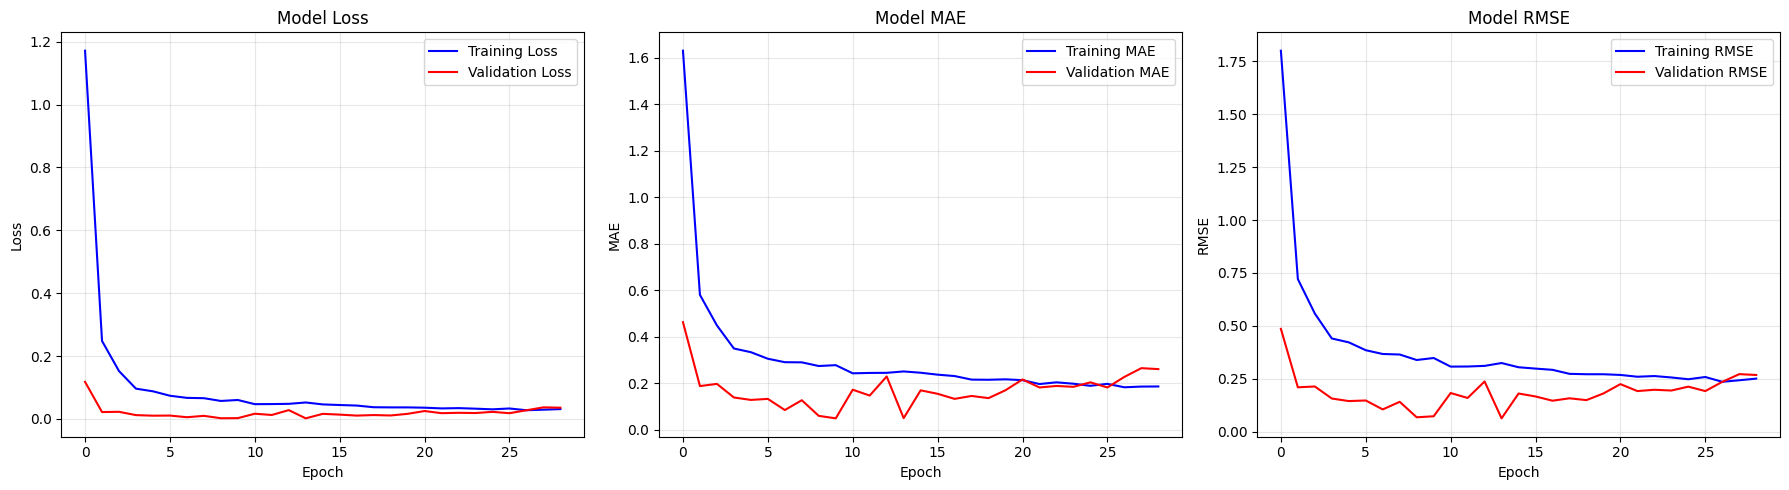


[DEBUG] Walk-forward validation:
  - Test data shape: (200, 27)
  - Look back: 3
  - Window size: 28
  - Valid test points: 197/197
  - Initial state shape: (1, 3, 14)
  - Initial state range: [-0.1973, 1.7488]
    Ponto 0: pred_scaled=-2.4356, pred_orig=1.6037
    Ponto 1: pred_scaled=-2.4059, pred_orig=2.1400
    Ponto 2: pred_scaled=-2.4799, pred_orig=0.8036
    Ponto 3: pred_scaled=-2.5540, pred_orig=-0.5340
    Ponto 4: pred_scaled=-2.4662, pred_orig=1.0514
    Ponto 5: pred_scaled=-2.4794, pred_orig=0.8129
    Ponto 6: pred_scaled=-2.4869, pred_orig=0.6769
    Ponto 7: pred_scaled=-2.4865, pred_orig=0.6851
    Ponto 8: pred_scaled=-2.4576, pred_orig=1.2064
    Ponto 9: pred_scaled=-2.3453, pred_orig=3.2350


IndexError: index 197 is out of bounds for axis 0 with size 197

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
import warnings
import os
warnings.filterwarnings('ignore')

# Configuração de estilo para plots
plt.style.use('default')
sns.set_palette("husl")

def preprocess_multivariate_data(df):
    """
    Pré-processa dados multivariados com tratamento adequado da escala
    """
    print(f"[DEBUG] Pré-processando dados:")
    print(f"  - Shape inicial: {df.shape}")
    print(f"  - Colunas: {df.columns.tolist()}")
    
    df = df.copy()
    
    # Análise inicial dos dados
    print(f"\n[DEBUG] Análise da throughput_raw:")
    throughput_raw_valid = df['throughput_raw'].dropna()
    if len(throughput_raw_valid) > 0:
        print(f"  - Min: {throughput_raw_valid.min():,.0f}")
        print(f"  - Max: {throughput_raw_valid.max():,.0f}")
        print(f"  - Mean: {throughput_raw_valid.mean():,.0f}")
        print(f"  - Std: {throughput_raw_valid.std():,.0f}")
    
    print(f"  - NaN count: {df['throughput_raw'].isna().sum()}")
    print(f"  - Valores únicos: {df['throughput_raw'].nunique()}")
    
    # Análise do throughput_raw
    print(f"\n[DEBUG] Análise do throughput_raw:")
    throughput_valid = df['throughput_raw'].dropna()
    if len(throughput_valid) > 0:
        print(f"  - Min: {throughput_valid.min():,.0f}")
        print(f"  - Max: {throughput_valid.max():,.0f}")
        print(f"  - Mean: {throughput_valid.mean():,.0f}")
        print(f"  - Std: {throughput_valid.std():,.0f}")
    
    # Converter para Mbps (assumindo que está em bits/s)
    # 1 Mbps = 1,000,000 bits/s
    print(f"\n[DEBUG] Convertendo para Mbps...")
    df['throughput_raw_Mbps'] = df['throughput_raw'] / 1_000_000
    df['throughput_raw_Mbps'] = df['throughput_raw'] / 1_000_000
    
    # Verificar conversão
    throughput_raw_mbps_valid = df['throughput_raw_Mbps'].dropna()
    if len(throughput_raw_mbps_valid) > 0:
        print(f"  - throughput_raw_Mbps Min: {throughput_raw_mbps_valid.min():.2f}")
        print(f"  - throughput_raw_Mbps Max: {throughput_raw_mbps_valid.max():.2f}")
        print(f"  - throughput_raw_Mbps Mean: {throughput_raw_mbps_valid.mean():.2f}")
        print(f"  - throughput_raw_Mbps Std: {throughput_raw_mbps_valid.std():.2f}")
    
    # Criar features derivadas mais informativas
    print(f"\n[DEBUG] Criando features derivadas...")
    
    # Features temporais melhoradas
    df['hour_normalized'] = df['hour'] / 23.0  # Normalizar 0-1
    df['day_of_week_normalized'] = df['day_of_week'] / 6.0  # Normalizar 0-1
    
    # Features cíclicas (já existem, mas vamos normalizar melhor)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    
    # Features de tendência temporal
    if 'time_since_start' in df.columns:
        df['time_since_start_hours'] = df['time_since_start']
        # Normalizar por período (assumindo dados por várias semanas)
        if df['time_since_start'].max() > 0:
            df['time_since_start_norm'] = df['time_since_start'] / df['time_since_start'].max()
        else:
            df['time_since_start_norm'] = 0.0
    
    # Features de confiabilidade melhoradas
    if 'is_real' in df.columns and 'time_since_last_real' in df.columns:
        # Decaimento exponencial da confiabilidade
        df['reliability_score'] = np.where(
            df['is_real'] == 1,
            1.0,
            np.exp(-df['time_since_last_real'] / 12.0)  # Decai em 12 horas
        )
        
        # Normalizar time_since_last_real
        if df['time_since_last_real'].max() > 0:
            df['time_since_last_real_norm'] = np.clip(
                df['time_since_last_real'] / 24.0, 0, 1
            )
        else:
            df['time_since_last_real_norm'] = 0.0
    
    # Features de padrão semanal
    df['is_weekend_int'] = df['is_weekend'].astype(int)
    df['is_business_hour'] = ((df['hour'] >= 8) & (df['hour'] <= 18)).astype(int)
    
    # Feature de mudança/variação (lag features)
    df['throughput_raw_lag_1'] = df['throughput_raw_Mbps'].shift(1)
    df['throughput_raw_lag_2'] = df['throughput_raw_Mbps'].shift(2)
    df['throughput_lag_1'] = df['throughput_raw_Mbps'].shift(1)
    
    # Diferenças (indicadores de mudança)
    df['throughput_raw_diff_1'] = df['throughput_raw_Mbps'] - df['throughput_raw_lag_1']
    df['throughput_raw_diff_2'] = df['throughput_raw_lag_1'] - df['throughput_raw_lag_2']
    
    print(f"\n[DEBUG] Features criadas:")
    print(f"  - throughput_raw_Mbps: {df['throughput_raw_Mbps'].describe()}")
    print(f"  - reliability_score: {df['reliability_score'].describe()}")
    
    return df

def create_feature_sets():
    """
    Define diferentes conjuntos de features para testar
    """
    # Conjunto básico - apenas features temporais e target
    basic_features = [
        'throughput_raw_Mbps',
        'hour_normalized',
        'day_of_week_normalized',
        'is_weekend_int',
        'is_business_hour'
    ]
    
    # Conjunto com features cíclicas
    cyclical_features = basic_features + [
        'hour_sin', 'hour_cos',
        'day_sin', 'day_cos'
    ]
    
    # Conjunto com features de tendência
    trend_features = cyclical_features + [
        'time_since_start_norm',
        'relative_day'
    ]
    
    # Conjunto com features de confiabilidade
    reliability_features = trend_features + [
        'is_real',
        'time_since_last_real_norm',
        'reliability_score'
    ]
    
    # Conjunto com lags (mais completo)
    lag_features = reliability_features + [
        'throughput_raw_Mbps',
        'throughput_raw_lag_1',
        'throughput_raw_lag_2',
        'throughput_lag_1',
        'throughput_raw_diff_1',
        'throughput_raw_diff_2'
    ]
    
    return {
        'basic': basic_features,
        'cyclical': cyclical_features,
        'trend': trend_features,
        'reliability': reliability_features,
        'lag': lag_features
    }

def create_multivariate_dataset(data, feature_columns, target_column, look_back=3):
    """
    Cria dataset multivariado para LSTM
    """
    print(f"[DEBUG] Criando dataset multivariado:")
    print(f"  - Shape dos dados: {data.shape}")
    print(f"  - Features: {feature_columns}")
    print(f"  - Target: {target_column}")
    print(f"  - Look back: {look_back}")
    
    # Verificar se todas as features existem
    missing_features = [f for f in feature_columns if f not in data.columns]
    if missing_features:
        print(f"[WARNING] Features ausentes: {missing_features}")
        feature_columns = [f for f in feature_columns if f in data.columns]
        print(f"[INFO] Usando features: {feature_columns}")
    
    Xs, ys = [], []
    
    for i in range(len(data) - look_back):
        # Features: incluem todas as colunas especificadas
        features = data[feature_columns].iloc[i:i+look_back].values
        
        # Verificar se há NaN nas features
        if np.any(np.isnan(features)):
            continue
        
        Xs.append(features)
        
        # Target: vazão no próximo timestep
        target = data[target_column].iloc[i+look_back]
        
        # Verificar se target é válido
        if np.isnan(target):
            continue
            
        ys.append(target)
    
    X_array = np.array(Xs, dtype=np.float32)
    y_array = np.array(ys, dtype=np.float32)
    
    print(f"[DEBUG] Dataset criado:")
    print(f"  - X shape: {X_array.shape}")
    print(f"  - y shape: {y_array.shape}")
    
    if len(X_array) > 0:
        print(f"  - X range: [{np.min(X_array):.4f}, {np.max(X_array):.4f}]")
        print(f"  - y range: [{np.min(y_array):.4f}, {np.max(y_array):.4f}]")
    
    return X_array, y_array

def create_multivariate_lstm(units, n_features, look_back, learning_rate):
    """
    Cria modelo LSTM otimizado para vazão de rede
    """
    print(f"[DEBUG] Criando modelo LSTM:")
    print(f"  - Units: {units}")
    print(f"  - Features: {n_features}")
    print(f"  - Look back: {look_back}")
    print(f"  - Learning rate: {learning_rate}")
    
    model = Sequential()
    
    # Primeira camada LSTM
    model.add(LSTM(
        units=units, 
        return_sequences=True, 
        input_shape=(look_back, n_features),
        dropout=0.1,
        recurrent_dropout=0.1
    ))
    
    # Segunda camada LSTM
    model.add(LSTM(
        units=units//2, 
        return_sequences=False,
        dropout=0.1,
        recurrent_dropout=0.1
    ))
    
    # Camadas densas
    model.add(Dense(units//4, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units//8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # Compilação com Huber loss (mais robusta)
    model.compile(
        loss=Huber(delta=1.0),
        optimizer=Adam(learning_rate=learning_rate, clipnorm=1.0),
        metrics=['mae', RootMeanSquaredError()]
    )
    
    print(f"[DEBUG] Modelo compilado com sucesso")
    model.summary()
    
    return model

def create_scalers(train_data, feature_columns, target_column):
    """
    Cria scalers apropriados para diferentes tipos de features
    """
    print(f"[DEBUG] Criando scalers:")
    
    scalers = {}
    
    # Usar StandardScaler para features que podem ter outliers
    # MinMaxScaler para features já normalizadas
    
    for feature in feature_columns:
        if feature in train_data.columns:
            feature_data = train_data[feature].dropna().values.reshape(-1, 1)
            
            if len(feature_data) == 0:
                print(f"  - {feature}: SEM DADOS - pulando")
                continue
            
            # Escolher scaler baseado na feature
            if feature.endswith('_norm') or feature.endswith('_normalized') or \
               feature in ['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'is_weekend_int', 
                          'is_real', 'is_business_hour', 'reliability_score']:
                scaler = MinMaxScaler()
            else:
                scaler = StandardScaler()
            
            scaler.fit(feature_data)
            scalers[feature] = scaler
            
            print(f"  - {feature}: {type(scaler).__name__} "
                  f"[{np.min(feature_data):.4f}, {np.max(feature_data):.4f}]")
    
    # Scaler especial para o target
    target_data = train_data[target_column].dropna().values.reshape(-1, 1)
    target_scaler = StandardScaler()
    target_scaler.fit(target_data)
    scalers[target_column] = target_scaler
    
    print(f"  - {target_column}: StandardScaler "
          f"[{np.min(target_data):.4f}, {np.max(target_data):.4f}]")
    
    return scalers

def scale_features(data, feature_columns, scalers):
    """
    Aplica scaling nas features
    """
    scaled_data = data.copy()
    
    for feature in feature_columns:
        if feature in scalers:
            original_values = scaled_data[feature].values.reshape(-1, 1)
            scaled_values = scalers[feature].transform(original_values)
            scaled_data[feature] = scaled_values.flatten()
        else:
            print(f"[WARNING] Feature {feature} não tem scaler")
    
    return scaled_data

def train_model_with_validation(X_train, y_train, n_features, look_back, 
                               learning_rate=0.001, epochs=100, batch_size=32):
    """
    Treina modelo com validação temporal
    """
    print(f"\n[DEBUG] Treinando modelo:")
    print(f"  - X_train shape: {X_train.shape}")
    print(f"  - y_train shape: {y_train.shape}")
    print(f"  - y_train range: [{np.min(y_train):.4f}, {np.max(y_train):.4f}]")
    
    # Criar modelo
    model = create_multivariate_lstm(128, n_features, look_back, learning_rate)
    
    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            min_delta=1e-6,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-6,
            verbose=1
        )
    ]
    
    # Treinamento
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )
    
    return model, history

def walk_forward_validation(model, scalers, train_data, test_data, 
                          feature_columns, target_column, mask_test, 
                          look_back, window_size=1):
    """
    Executa walk-forward validation otimizado
    """
    print(f"\n[DEBUG] Walk-forward validation:")
    print(f"  - Test data shape: {test_data.shape}")
    print(f"  - Look back: {look_back}")
    print(f"  - Window size: {window_size}")
    print(f"  - Valid test points: {mask_test.sum()}/{len(mask_test)}")
    
    # Preparar dados iniciais
    train_scaled = scale_features(train_data, feature_columns, scalers)
    
    # Estado inicial
    initial_state = train_scaled[feature_columns].iloc[-look_back:].values
    initial_state = initial_state.reshape(1, look_back, len(feature_columns))
    
    print(f"  - Initial state shape: {initial_state.shape}")
    print(f"  - Initial state range: [{np.min(initial_state):.4f}, {np.max(initial_state):.4f}]")
    
    predictions = []
    current_state = initial_state.copy()
    
    target_scaler = scalers[target_column]
    
    # Processar ponto por ponto
    for i in range(len(test_data)):
        # Fazer predição
        try:
            pred_scaled = model.predict(current_state, verbose=0)
            pred_original = target_scaler.inverse_transform(pred_scaled.reshape(-1, 1))[0, 0]
            predictions.append(pred_original)
            
            if i < 10:  # Log primeiras predições
                print(f"    Ponto {i}: pred_scaled={pred_scaled[0,0]:.4f}, pred_orig={pred_original:.4f}")
            
        except Exception as e:
            print(f"[ERROR] Erro na predição {i}: {e}")
            predictions.append(np.nan)
            continue
        
        # Preparar próximo estado
        if i < len(test_data) - 1:
            next_row = test_data.iloc[i].copy()
            
            # Se ponto ausente, usar predição
            if not mask_test[i]:
                next_row[target_column] = pred_original
                # Atualizar features de confiabilidade
                if 'reliability_score' in next_row.index:
                    next_row['reliability_score'] = max(0.1, next_row['reliability_score'] * 0.9)
            
            # Escalar próximo ponto
            try:
                next_scaled = scale_features(
                    pd.DataFrame([next_row]), feature_columns, scalers
                )
                next_features = next_scaled[feature_columns].iloc[0].values
                
                # Atualizar estado
                current_state = np.roll(current_state, -1, axis=1)
                current_state[0, -1, :] = next_features
                
            except Exception as e:
                print(f"[ERROR] Erro ao atualizar estado {i}: {e}")
                continue
    
    print(f"  - Predições geradas: {len(predictions)}")
    
    return np.array(predictions)

def evaluate_predictions(predictions, actual, mask, model_name):
    """
    Avalia predições apenas nos pontos válidos
    """
    print(f"\n[DEBUG] Avaliando {model_name}:")
    
    # Garantir arrays 1D
    predictions = np.array(predictions).flatten()
    actual = np.array(actual).flatten()
    mask = np.array(mask).astype(bool).flatten()
    
    # Ajustar tamanhos
    min_len = min(len(predictions), len(actual), len(mask))
    predictions = predictions[:min_len]
    actual = actual[:min_len]
    mask = mask[:min_len]
    
    print(f"  - Tamanho final: {min_len}")
    print(f"  - Pontos válidos: {mask.sum()}")
    
    # Remover NaN
    valid_idx = ~np.isnan(predictions) & ~np.isnan(actual)
    predictions = predictions[valid_idx]
    actual = actual[valid_idx]
    mask = mask[valid_idx]
    
    print(f"  - Após remoção NaN: {len(predictions)}")
    
    # Avaliar apenas pontos válidos
    valid_preds = predictions[mask]
    valid_actual = actual[mask]
    
    if len(valid_actual) == 0:
        print(f"[ERROR] Nenhum ponto válido para avaliação!")
        return np.nan, np.nan, np.nan, model_name
    
    print(f"  - Pontos para avaliação: {len(valid_actual)}")
    print(f"  - Pred range: [{np.min(valid_preds):.2f}, {np.max(valid_preds):.2f}]")
    print(f"  - Actual range: [{np.min(valid_actual):.2f}, {np.max(valid_actual):.2f}]")
    
    # Calcular métricas
    mae = np.mean(np.abs(valid_preds - valid_actual))
    mse = np.mean((valid_preds - valid_actual) ** 2)
    rmse = np.sqrt(mse)
    
    # NRMSE baseado no desvio padrão
    nrmse = rmse / (np.std(valid_actual) + 1e-12)
    
    print(f"\n{model_name} - Métricas:")
    print(f"  MAE:   {mae:.2f} Mbps")
    print(f"  RMSE:  {rmse:.2f} Mbps")
    print(f"  NRMSE: {nrmse*100:.2f}%")
    
    return rmse, mae, nrmse, model_name

def plot_comprehensive_results(predictions, actual, mask, model_name, save_dir=None):
    """
    Plota resultados completos
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Série temporal completa
    ax1 = axes[0, 0]
    indices = np.arange(len(actual))
    
    ax1.plot(indices[mask], actual[mask], 'o-', label='Valores Reais', 
             color='blue', markersize=2, alpha=0.7)
    
    valid_preds = ~np.isnan(predictions)
    ax1.plot(indices[valid_preds], predictions[valid_preds], 'o-', 
             label='Predições', color='red', markersize=2, alpha=0.7)
    
    ax1.set_title(f'{model_name} - Série Temporal')
    ax1.set_xlabel('Tempo')
    ax1.set_ylabel('Vazão (Mbps)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Scatter plot
    ax2 = axes[0, 1]
    valid_both = mask & valid_preds
    if valid_both.any():
        ax2.scatter(actual[valid_both], predictions[valid_both], alpha=0.6, s=10)
        
        # Linha de referência
        min_val = min(np.min(actual[valid_both]), np.min(predictions[valid_both]))
        max_val = max(np.max(actual[valid_both]), np.max(predictions[valid_both]))
        ax2.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
        
        ax2.set_xlabel('Valores Reais (Mbps)')
        ax2.set_ylabel('Predições (Mbps)')
        ax2.set_title('Scatter Plot - Real vs Predito')
        ax2.grid(True, alpha=0.3)
    
    # Plot 3: Resíduos
    ax3 = axes[1, 0]
    if valid_both.any():
        residuals = predictions[valid_both] - actual[valid_both]
        ax3.scatter(actual[valid_both], residuals, alpha=0.6, s=10)
        ax3.axhline(y=0, color='r', linestyle='--', alpha=0.8)
        ax3.set_xlabel('Valores Reais (Mbps)')
        ax3.set_ylabel('Resíduos (Mbps)')
        ax3.set_title('Análise de Resíduos')
        ax3.grid(True, alpha=0.3)
    
    # Plot 4: Histograma dos resíduos
    ax4 = axes[1, 1]
    if valid_both.any():
        residuals = predictions[valid_both] - actual[valid_both]
        ax4.hist(residuals, bins=30, alpha=0.7, density=True)
        ax4.set_xlabel('Resíduos (Mbps)')
        ax4.set_ylabel('Densidade')
        ax4.set_title('Distribuição dos Resíduos')
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_dir:
        plt.savefig(f"{save_dir}/results_{model_name}.png", dpi=300, bbox_inches='tight')
    
    plt.show()

def plot_training_history(history, save_dir=None):
    """
    Plota histórico de treinamento
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Loss
    ax1 = axes[0]
    ax1.plot(history.history['loss'], label='Training Loss', color='blue')
    if 'val_loss' in history.history:
        ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # MAE
    ax2 = axes[1]
    if 'mae' in history.history:
        ax2.plot(history.history['mae'], label='Training MAE', color='blue')
        if 'val_mae' in history.history:
            ax2.plot(history.history['val_mae'], label='Validation MAE', color='red')
        ax2.set_title('Model MAE')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('MAE')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    # RMSE
    ax3 = axes[2]
    if 'root_mean_squared_error' in history.history:
        ax3.plot(history.history['root_mean_squared_error'], 
                label='Training RMSE', color='blue')
        if 'val_root_mean_squared_error' in history.history:
            ax3.plot(history.history['val_root_mean_squared_error'], 
                    label='Validation RMSE', color='red')
        ax3.set_title('Model RMSE')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('RMSE')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_dir:
        plt.savefig(f"{save_dir}/training_history.png", dpi=300, bbox_inches='tight')
    
    plt.show()

def process_multivariate_dataset(df, feature_set='reliability', look_back=6, window_size=1):
    """
    Processa dataset multivariado completo
    """
    print("="*80)
    print("PROCESSAMENTO LSTM MULTIVARIADO - VAZÃO DE REDE")
    print("="*80)
    
    # Pré-processamento
    df = preprocess_multivariate_data(df)
    
    # Selecionar conjunto de features
    feature_sets = create_feature_sets()
    
    if feature_set not in feature_sets:
        print(f"[ERROR] Feature set '{feature_set}' não encontrado!")
        print(f"Disponíveis: {list(feature_sets.keys())}")
        return None
    
    feature_columns = feature_sets[feature_set]
    target_column = 'throughput_raw_Mbps'
    
    print(f"\n[INFO] Usando feature set: {feature_set}")
    print(f"[INFO] Features ({len(feature_columns)}): {feature_columns}")
    print(f"[INFO] Target: {target_column}")
    
    # Verificar features existentes
    existing_features = [f for f in feature_columns if f in df.columns]
    missing_features = [f for f in feature_columns if f not in df.columns]
    
    if missing_features:
        print(f"[WARNING] Features ausentes: {missing_features}")
        feature_columns = existing_features
    
    # Criar máscara para pontos válidos
    mask_total = ~(df[target_column].isna())
    print(f"\n[INFO] Pontos válidos: {mask_total.sum()}/{len(mask_total)} ({mask_total.mean()*100:.1f}%)")
    
    # Split treino-teste
    train_size = int(len(df) * 0.8)
    train_data = df.iloc[:train_size].copy()
    test_data = df.iloc[train_size:].copy()
    
    print(f"\n[INFO] Split:")
    print(f"  - Treino: {len(train_data)} pontos")
    print(f"  - Teste: {len(test_data)} pontos")
    
    # Tratamento de dados faltantes no treino
    print(f"\n[INFO] Tratando dados faltantes no treino...")
    
    # Interpolação para features principais
    for col in [target_column, 'throughput_raw_Mbps']:
        if col in train_data.columns:
            train_data[col] = train_data[col].interpolate(method='linear', limit_direction='both')
            if train_data[col].isna().sum() > 0:
                mean_val = train_data[col].mean()
                print(f"  - Preenchendo valores restantes em {col} com média: {mean_val:.2f}")
                train_data[col] = train_data[col].fillna(mean_val)

    # Criar scalers
    scalers = create_scalers(train_data, feature_columns, target_column)

    # Normalizar dados
    train_scaled = scale_features(train_data, feature_columns + [target_column], scalers)
    test_scaled = scale_features(test_data, feature_columns + [target_column], scalers)

    # Criar datasets
    X_train, y_train = create_multivariate_dataset(train_scaled, feature_columns, target_column, look_back)
    X_test, y_test = create_multivariate_dataset(test_scaled, feature_columns, target_column, look_back)

    # Treinar modelo
    model, history = train_model_with_validation(X_train, y_train, len(feature_columns), look_back)
    plot_training_history(history)

    # Máscara para avaliação
    mask_test = mask_total.iloc[train_size:].values[look_back:]

    # Predição
    predictions = walk_forward_validation(
        model=model,
        scalers=scalers,
        train_data=train_data,
        test_data=test_data,
        feature_columns=feature_columns,
        target_column=target_column,
        mask_test=mask_test,
        look_back=look_back,
        window_size=window_size
    )

    # Avaliação
    actual = test_data[target_column].iloc[look_back:].values
    rmse, mae, nrmse, model_name = evaluate_predictions(predictions, actual, mask_test, f"LSTM_{feature_set}")

    # Resultados visuais
    plot_comprehensive_results(predictions, actual, mask_test, model_name)

    return {
        'model': model,
        'scalers': scalers,
        'feature_columns': feature_columns,
        'evaluation': {
            'rmse': rmse,
            'mae': mae,
            'nrmse': nrmse
        },
        'predictions': predictions,
        'actual': actual,
        'mask': mask_test
    }


# Exemplo de uso
def main_example():
    """
    Exemplo de uso do código
    """
    # Gerar dados sintéticos para teste
    np.random.seed(42)
    
    n_samples = 1000
    dates = pd.date_range('2023-01-01', periods=n_samples, freq='h')
    
    # Criar dados sintéticos
    df = pd.DataFrame({
        'Data': dates,
        'throughput_raw': np.random.normal(100, 20, n_samples),
        'throughput_raw': np.random.normal(50000000, 10000000, n_samples),
        'hour': dates.hour,
        'day_of_week': dates.dayofweek,
        'relative_day': np.arange(n_samples) // 24,
        'is_weekend': (dates.dayofweek >= 5).astype(int),
        'time_since_start': np.arange(n_samples),
        'hour_sin': np.sin(2 * np.pi * dates.hour / 24),
        'hour_cos': np.cos(2 * np.pi * dates.hour / 24),
        'is_real': np.random.choice([0, 1], n_samples, p=[0.1, 0.9]),
        'time_since_last_real': np.random.exponential(2, n_samples)
    })
    
    # Introduzir alguns valores ausentes
    missing_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
    df.loc[missing_indices, 'throughput_raw'] = -1
    df.loc[missing_indices, 'throughput_raw'] = -1
    
    print("Dados sintéticos criados com sucesso!")
    print(f"Shape: {df.shape}")
    print(f"Valores ausentes: {(df['throughput_raw'] == -1).sum()}")
    
    # Processar dataset
    results = process_multivariate_dataset(df, look_back=3, window_size=28)
    
    print("\n" + "="*80)
    print("RESULTADOS FINAIS")
    print("="*80)
    print(f"RMSE: {results['evaluation'][0]:.4f}")
    print(f"MAE: {results['evaluation'][1]:.4f}")
    print(f"NRMSE: {results['evaluation'][2]*100:.2f}%")
    print(f"Data Range: {results['evaluation'][3]:.4f}")
    
    return results

if __name__ == "__main__":
    # Executar exemplo
    results = main_example()
    print("\nProcessamento concluído com sucesso!")